<a href="https://colab.research.google.com/github/envirodatascience/final-project-go-squirrels/blob/main/Sophie's_Squirrel_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will address the sub-question: Does the weather affect squirrels behaviors? Does the weather affect the number of squirrels observed on a day?

In [1]:
#Import packages

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import plotnine
from plotnine import *
from plotnine import scales
import geopandas as gpd
import seaborn as sns

# Import data and orient to data

In [2]:
# Read squirrel data
url = 'https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250408.csv'
df_sq_2018 = pd.read_csv(url)
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
df_sq_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [4]:
urlweather = 'https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/Central_Park_Weather.csv'
df_weather = pd.read_csv(urlweather)
df_weather.head()

,Date,Temperature,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,NaN,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,NaN,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,NaN,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,NaN,0,4,0.04,0.0,0


In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           68 non-null     object 
 1   Temperature    69 non-null     object 
 2   Unnamed: 2     69 non-null     object 
 3   Unnamed: 3     69 non-null     object 
 4   Unnamed: 4     69 non-null     object 
 5   Unnamed: 5     0 non-null      float64
 6   HDD            68 non-null     object 
 7   CDD            68 non-null     object 
 8   Precipitation  68 non-null     object 
 9   New Snow       68 non-null     object 
 10  Snow Depth     68 non-null     object 
dtypes: float64(1), object(10)
memory usage: 6.1+ KB


# Clean Data

In [6]:
df_weather.rename(columns = {'Temperature':'Temp Max', 'Unnamed: 2':'Temp Min', 'Unnamed: 3':'Temp Avg', 'Unnamed: 4':'Temp Departure'}, inplace = True)
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,Unnamed: 5,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,NaN,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,NaN,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,NaN,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,NaN,0,4,0.04,0.0,0


In [7]:
df_weather = df_weather.drop('Unnamed: 5', axis=1) #This is a blank column that never contained any data
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0


In [8]:
df_weather = df_weather.drop(df_weather.index[0]) #drop row 0 because it was a multi-index column format and I adjusted column headings
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
5,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [9]:
df_weather = df_weather.reset_index(drop=True) #reset index after dropping column and row

In [10]:
df_weather['Date'] = df_weather['Date'].astype(str) #converted to string so I can make the date formats match for merge

In [11]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'], errors='coerce')
df_weather.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
1,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
2,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
3,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
4,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [12]:
df_sq_2018['Date'] = df_sq_2018['Date'].astype(str) #converted to string so I can make the date format match the weather df

In [13]:
def format_date(date_str):
    if len(date_str) == 7:  # For dates like 1062018 (single-digit month)
        return date_str[:1] + '/' + date_str[1:3] + '/' + date_str[3:]
    elif len(date_str) == 8:  # For dates like 10142018 (double-digit month)
        return date_str[:2] + '/' + date_str[2:4] + '/' + date_str[4:]
df_sq_2018['Date'] = df_sq_2018['Date'].apply(format_date)
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10/14/2018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10/19/2018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10/14/2018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10/17/2018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10/17/2018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [14]:
# Convert the 'Date' column to datetime objects
df_sq_2018['Date'] = pd.to_datetime(df_sq_2018['Date'])
df_sq_2018.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


# Merge datasets

In [15]:
merged_df = pd.merge(
    df_weather,
    df_sq_2018,
    on='Date',
    how='inner') #only matching dates
merged_df.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9706105896967 40.7698124821507)
2,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9738033257473 40.7711846894166)
3,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9568802149818 40.7972399133816)
4,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9576245992455 40.7873862510001)


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        3023 non-null   datetime64[ns]
 1   Temp Max                                    3023 non-null   object        
 2   Temp Min                                    3023 non-null   object        
 3   Temp Avg                                    3023 non-null   object        
 4   Temp Departure                              3023 non-null   object        
 5   HDD                                         3023 non-null   object        
 6   CDD                                         3023 non-null   object        
 7   Precipitation                               3023 non-null   object        
 8   New Snow                                    3023 non-null   object        
 9   Snow Dep

In [17]:
merged_df.drop_duplicates() #make sure there are no duplicate rows after merge

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
1,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9706105896967 40.7698124821507)
2,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9738033257473 40.7711846894166)
3,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9568802149818 40.7972399133816)
4,2018-10-06,68,63,65.5,4.0,0,1,0.00,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9576245992455 40.7873862510001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,2018-10-20,62,51,56.5,0.1,8,0,0.06,0.0,0,...,False,False,False,False,True,False,False,False,NaN,POINT (-73.9698592838836 40.7743071443959)
3019,2018-10-20,62,51,56.5,0.1,8,0,0.06,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9766693184436 40.7708879215854)
3020,2018-10-20,62,51,56.5,0.1,8,0,0.06,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9571808775915 40.7934443866725)
3021,2018-10-20,62,51,56.5,0.1,8,0,0.06,0.0,0,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9710991846972 40.7689827824241)


# Run analysis on if precipitation correlates with squirrel activity level.

In [18]:
merged_df['Precipitation'] = pd.to_numeric(merged_df['Precipitation'], errors = 'coerce') #convert to integer to be able to create binary precipitation column
merged_df['Precipitation'].mean()

np.float64(0.04669533575917963)

In [19]:
merged_df['Did Rain'] = (merged_df['Precipitation'] > 0).astype(int)
merged_df.head()

,Date,Temp Max,Temp Min,Temp Avg,Temp Departure,HDD,CDD,Precipitation,New Snow,Snow Depth,...,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Did Rain
0,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744),0
1,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9706105896967 40.7698124821507),0
2,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,False,False,NaN,POINT (-73.9738033257473 40.7711846894166),0
3,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9568802149818 40.7972399133816),0
4,2018-10-06,68,63,65.5,4.0,0,1,0.0,0.0,0,...,False,False,False,False,False,True,False,NaN,POINT (-73.9576245992455 40.7873862510001),0


In [20]:
merged_df['Did Rain'].value_counts() #see the count of squirrels on days when it rained vs not rained to check binary worked

,count
Did Rain,
0,2304
1,719


In [21]:
behavior_cols = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Approaches', 'Runs from'] #create higher level activities column excluding things like indifferent or tail twithces to be able to create an activity score

In [22]:
for col in behavior_cols:
    merged_df[col] = merged_df[col].astype(bool)

In [23]:
for col in behavior_cols:
    merged_df[col] = merged_df[col].astype(int)

In [24]:
merged_df['Activity Score'] = merged_df[behavior_cols].sum(axis=1) #creating scoring system, one point for each activity represented

In [25]:
Rain_Activity = merged_df[merged_df['Did Rain'] == 1]['Activity Score'] #set up to compare groups in a t-test later on
No_Rain_Activity = merged_df[merged_df['Did Rain'] == 0]['Activity Score']

In [26]:
print(Rain_Activity.mean())
print(No_Rain_Activity.mean())

1.6801112656467316
1.5234375


There is a difference in activity means, we should investigate if it is statistically significant. First, I want to see what it looks like.

In [27]:
merged_df['Date_str'] = merged_df['Date'].dt.strftime('%Y-%m-%d') #convert to enable dates to show on graph
merged_df['Did Rain'] = merged_df['Did Rain'].astype('category')

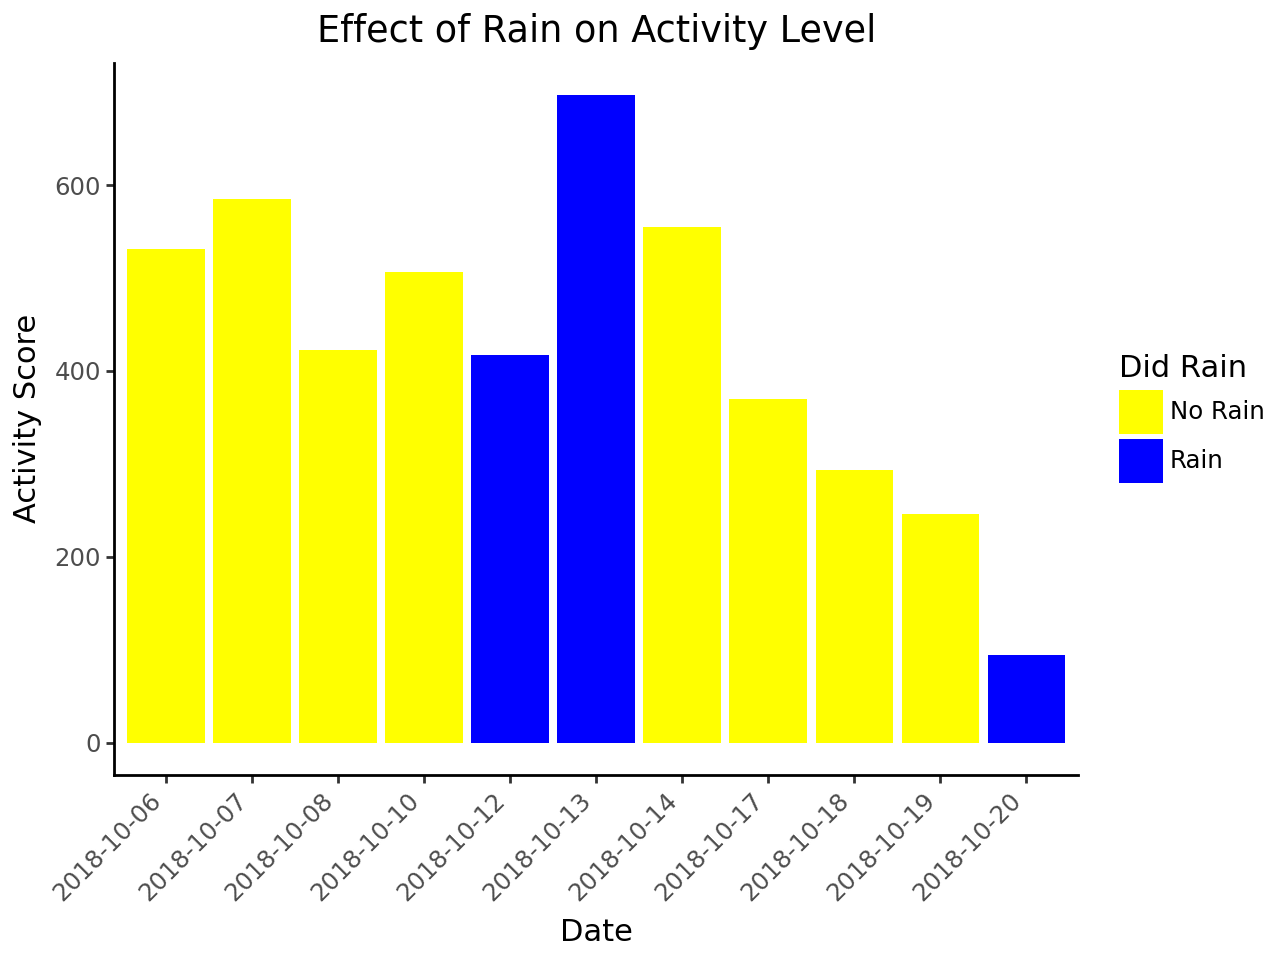

In [28]:
(
    ggplot(merged_df, aes(x='Date_str', y='Activity Score', fill='Did Rain')) #activity score here is taking all of the activity points on a given date
    + geom_col()
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title="Effect of Rain on Activity Level", x="Date", y="Activity Score")
)

In [29]:
average_activity_per_day = merged_df.groupby('Date')['Activity Score'].mean().reset_index() #find out the average activity score amongst squirrels on that date

In [30]:
merged_df = pd.merge(merged_df, average_activity_per_day, on='Date', suffixes=('', '_Avg')) # Merge the average activity score back to the original DataFrame
merged_df = merged_df.rename(columns={'Activity Score_Avg': 'Avg Activity Score'}) # Rename the columns for clarity

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_col : Removed 3012 rows containing missing values.


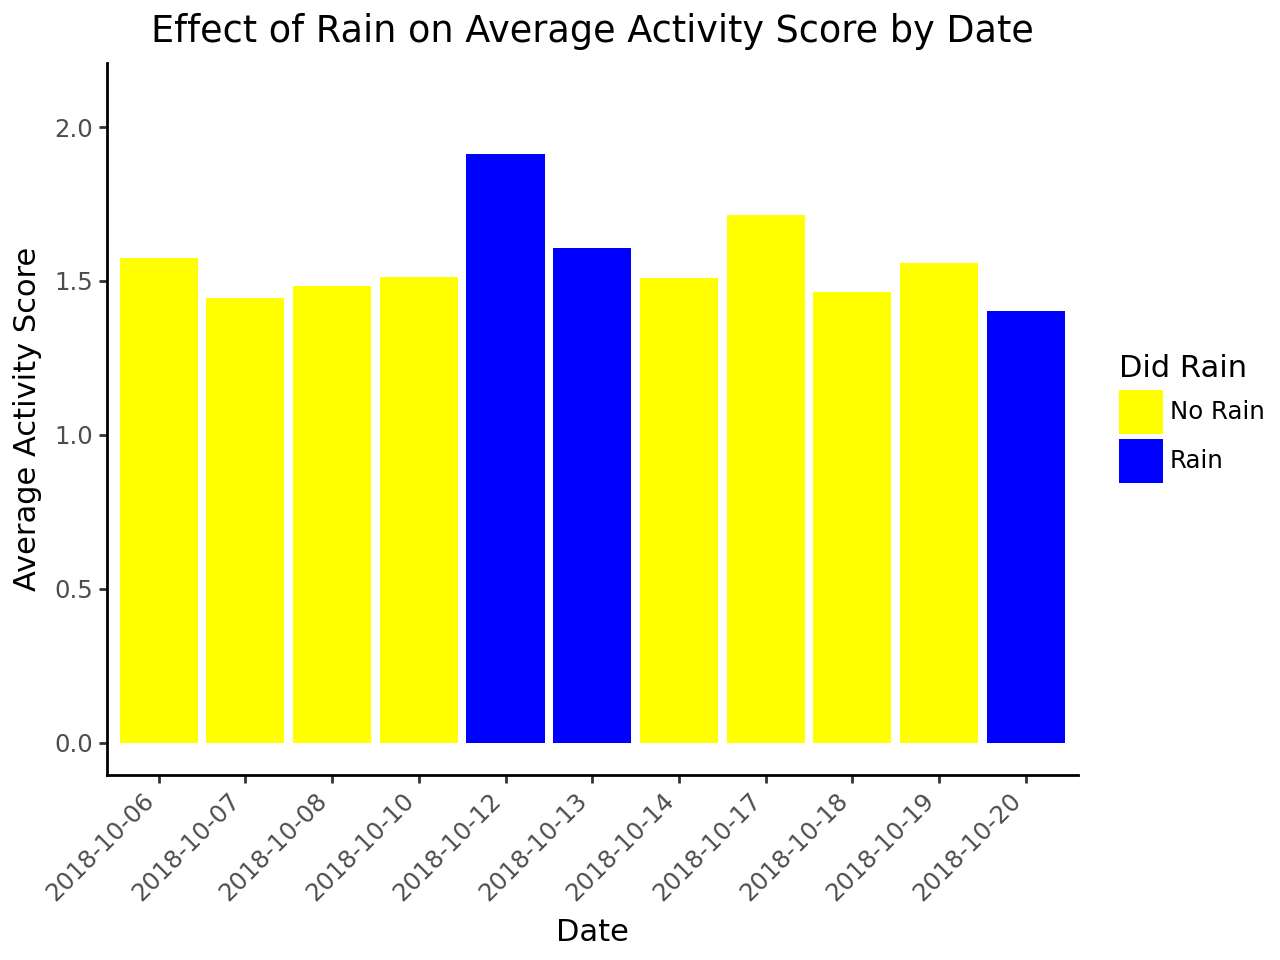

In [31]:
(
    ggplot(merged_df, aes(x='Date_str', y='Avg Activity Score', fill='Did Rain'))
    + geom_col()
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title="Effect of Rain on Average Activity Score by Date", x="Date", y="Average Activity Score")  # Update y-axis label
    + scale_y_continuous(limits=(0, merged_df['Avg Activity Score'].max() * 1.1))  # Adjust y-axis limits
)

This graph shows, that on average, there seems to be little difference in squirrel activity levels based on precipitation. However, lets investigate further.

In [32]:
t_stat, p_value = stats.ttest_ind(Rain_Activity, No_Rain_Activity, equal_var=False) #Welch's t-test to account for diffence in sample size of rainy days
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 4.077919964383215
p-value: 4.870124576375194e-05


This is a signficiant p-value (< 0.05) and a signficiant t-stat (> 2) but because of such a small sample size lets run a regression for more information.

In [33]:
y = merged_df['Avg Activity Score']
X = merged_df['Did Rain']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:     Avg Activity Score   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          9.93e-233
Time:                        19:50:07   Log-Likelihood:                 2587.1
No. Observations:                3023   AIC:                            -5170.
Df Residuals:                    3021   BIC:                            -5158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5234      0.002    710.931      0.0

The p-value is signficant here since the value is < 0.05. It is an insanely small p-value which may be because of how small the data size is. The results may indicate that rain affected what behaviors a squirrel showed. However, the R2 is low meaning the model is likely not a good fit, since it only explains about 30% of variation, but for this amount of data it is not a terrible fit. Out of the eleven days surveyed (already a small data range), it only rained for three of the days.

# Run analysis on if precipitation correlates with the number of squirrels observed in a day.

In [60]:
merged_df['Unique Squirrel ID'].nunique() #see how many squirrels are observed

3018

In [35]:
squirrel_counts = merged_df.groupby('Did Rain').agg(n_unq = ('Unique Squirrel ID', 'count')).reset_index() #group counts of squirrels observed on days it rained versus days it did not
print (squirrel_counts)

  Did Rain  n_unq
0        0   2304
1        1    719


<ipython-input-35-465e08c7a240>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [36]:
squirrel_counts_by_date = merged_df.groupby('Date')['Unique Squirrel ID'].nunique().reset_index(name='Squirrel Count') #group counts by date

In [37]:
squirrel_counts_by_date = pd.merge(
    squirrel_counts_by_date,
    merged_df[['Date', 'Did Rain']].drop_duplicates(),  # Ensure unique Date-Did Rain pairs
    on='Date',
    how='left'
)

In [38]:
squirrel_counts_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            11 non-null     datetime64[ns]
 1   Squirrel Count  11 non-null     int64         
 2   Did Rain        11 non-null     category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 443.0 bytes


In [39]:
squirrel_counts_by_date.groupby('Date')['Squirrel Count'].mean()

,Squirrel Count
Date,
2018-10-06,336.0
2018-10-07,405.0
2018-10-08,285.0
2018-10-10,332.0
2018-10-12,218.0
2018-10-13,434.0
2018-10-14,368.0
2018-10-17,216.0
2018-10-18,200.0


There does seem to be a decline in squirrel count as it becomes later in October. This makes me wonder if their transition into a state of torpor (similar to hibernation but less intense) is based on seasonal timing rather than the actual weather. Must investigate further!

In [40]:
average_squirrel_counts = squirrel_counts_by_date.groupby('Did Rain')['Squirrel Count'].mean().reset_index() #investigate the average count for rain days in comparison to non rain days
print(average_squirrel_counts)

  Did Rain  Squirrel Count
0        0      287.375000
1        1      239.666667


<ipython-input-40-3a78b796e653>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [41]:
rainy_day_counts = squirrel_counts_by_date[squirrel_counts_by_date['Did Rain'] == 1]['Squirrel Count'] #setting up to compare groups in a t-test
non_rainy_day_counts = squirrel_counts_by_date[squirrel_counts_by_date['Did Rain'] == 0]['Squirrel Count']

In [42]:
t_stat, p_value = stats.ttest_ind(rainy_day_counts, non_rainy_day_counts, equal_var=False) #Welch's t-test to account for the different sample sizes.
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -0.42993918214519944
p-value: 0.7034811481468122


 This is a non-significant p-value (it is greater than 0.05) and non-significant t-statistic (it is less than 2). Let's see what it looks like!

In [43]:
squirrel_counts_by_date['Date_str'] = squirrel_counts_by_date['Date'].astype(str) #convert to be able to graph
squirrel_counts_by_date['Did Rain'] = squirrel_counts_by_date['Did Rain'].astype('category')

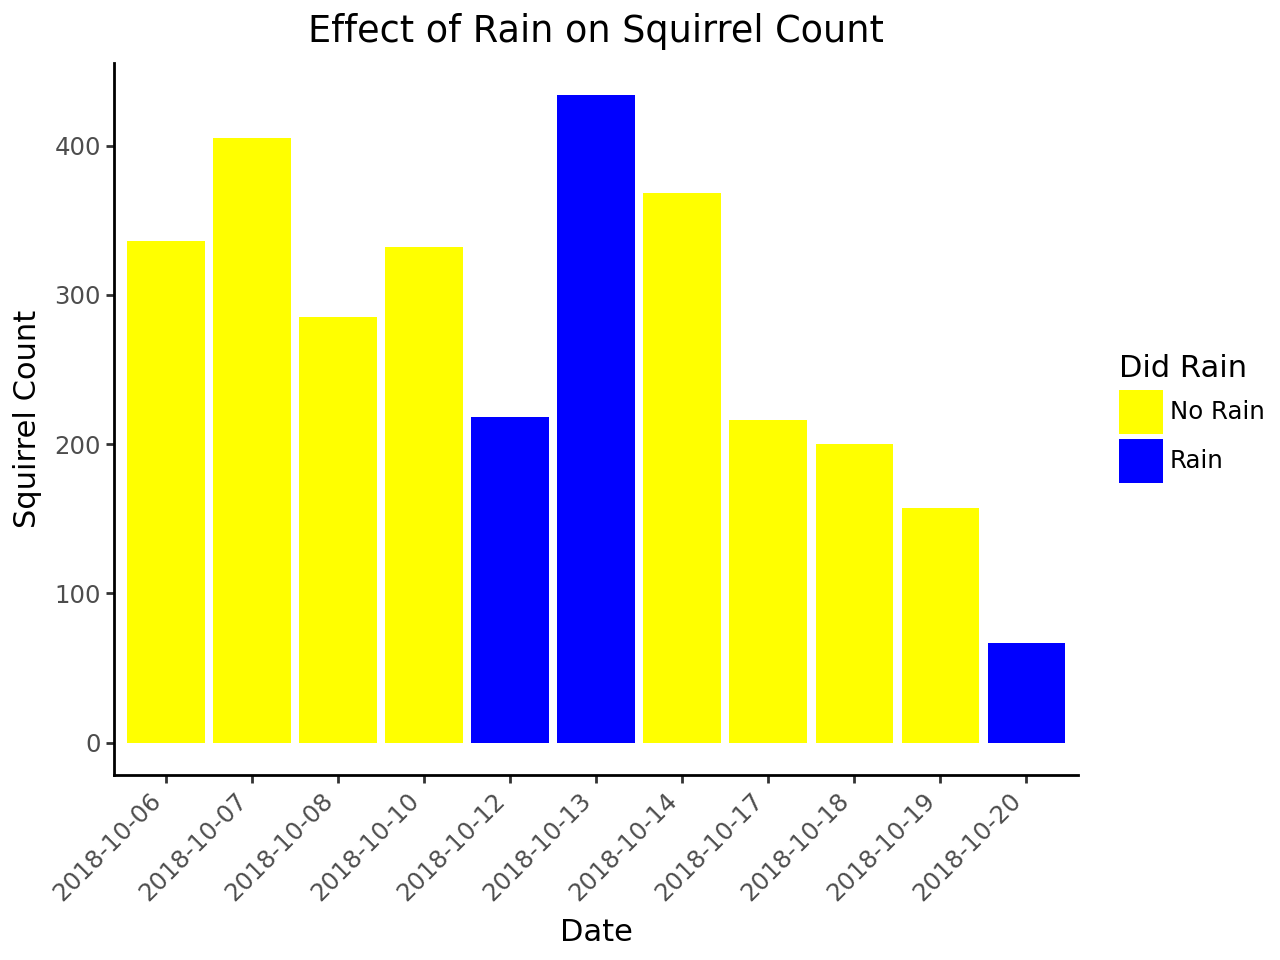

In [44]:
(
    ggplot(squirrel_counts_by_date, aes(x='Date_str', y='Squirrel Count', fill='Did Rain'))
    + geom_col()
    + scale_x_discrete(breaks=lambda x: x, labels=lambda x: [date[:10] for date in x])
    + scale_fill_manual(values=['yellow', 'blue'], labels=['No Rain', 'Rain'])  # Customize colors and labels
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels
    + labs(title="Effect of Rain on Squirrel Count", x="Date", y="Squirrel Count")  #update labels
)

In [45]:
merged_df.groupby('Date')['Precipitation'].value_counts() #checking to see if the amount of precipitation could explain difference between rain days

,,count
Date,Precipitation,
2018-10-06,0.00,337
2018-10-07,0.00,405
2018-10-08,0.00,285
2018-10-10,0.00,335
2018-10-12,0.43,218
2018-10-13,0.10,434
2018-10-14,0.00,368
2018-10-17,0.00,216
2018-10-18,0.00,200


In [46]:
y = squirrel_counts_by_date['Squirrel Count']
X = squirrel_counts_by_date['Did Rain']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:         Squirrel Count   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.3649
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.561
Time:                        19:50:08   Log-Likelihood:                -66.856
No. Observations:                  11   AIC:                             137.7
Df Residuals:                       9   BIC:                             138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        287.3750     41.243      6.968      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.


There is no significant effect on the squirrels viewed in a day depending on if it rained or not. The p-value is not significant. This may implicate that rain does not deter the squirrels from being out and about in the park. However, it is important to note that since the data was collected over 11 days this is an extremely small sample size and likely not conclusive of anything.

We looked at if precipitation effects count and it doesn't seem to. What about temperature?

# Run analysis on if temperature correlates with the number of squirrels observed in a day.

In [47]:
merged_df.groupby('Date')['Temp Avg'].value_counts()

,,count
Date,Temp Avg,
2018-10-06,65.5,337
2018-10-07,73.0,405
2018-10-08,69.0,285
2018-10-10,75.5,335
2018-10-12,59.5,218
2018-10-13,50.5,434
2018-10-14,52.5,368
2018-10-17,53.5,216
2018-10-18,46.0,200


In [48]:
squirrel_counts_by_date = pd.merge(squirrel_counts_by_date, merged_df[['Date', 'Temp Avg']], on='Date', how='left') #include temp avg

In [49]:
squirrel_counts_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3023 non-null   datetime64[ns]
 1   Squirrel Count  3023 non-null   int64         
 2   Did Rain        3023 non-null   category      
 3   Date_str        3023 non-null   object        
 4   Temp Avg        3023 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 97.7+ KB


In [50]:
# Convert 'Squirrel Count' and 'Temp Avg' columns to numeric, handling errors
squirrel_counts_by_date['Squirrel Count'] = pd.to_numeric(squirrel_counts_by_date['Squirrel Count'], errors='coerce')
squirrel_counts_by_date['Temp Avg'] = pd.to_numeric(squirrel_counts_by_date['Temp Avg'], errors='coerce')

In [51]:
y = squirrel_counts_by_date['Squirrel Count'] #run regression on the possible correlation between temperature and squirrel count
X = squirrel_counts_by_date['Temp Avg']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:         Squirrel Count   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           8.55e-36
Time:                        19:50:08   Log-Likelihood:                -17895.
No. Observations:                3023   AIC:                         3.579e+04
Df Residuals:                    3021   BIC:                         3.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.4611     10.100     18.858      0.0

There seems to be a significant p-value suggesting that temperature may correlate with the squirrel count. However, the R2 value is very small, meaning the model is likely not a great fit. Let's see what it looks like...

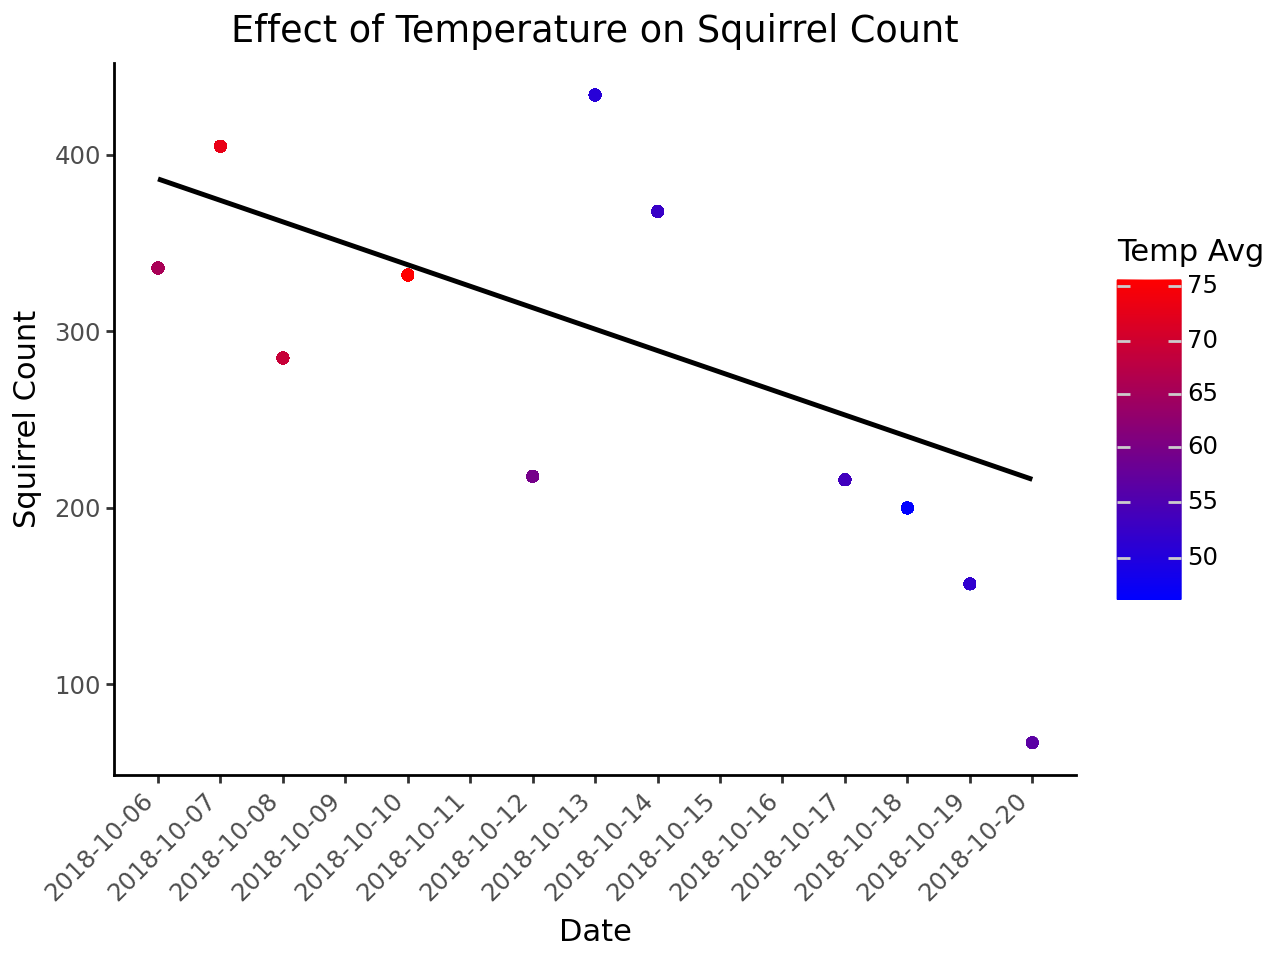

In [52]:
(
    ggplot(squirrel_counts_by_date, aes(x='Date', y='Squirrel Count', color='Temp Avg'))
    + geom_point(alpha=0.5)  # Add alpha for transparency
    + geom_smooth(method='lm', se=False, color='black')
    + scale_x_datetime(
        breaks=pd.date_range(squirrel_counts_by_date['Date'].min(), squirrel_counts_by_date['Date'].max(), freq='D')
    ) #ensure each date shows
    + scale_color_gradient(low='blue', high='red')  # Select gradient colors for visibility of when it gets cold
    + theme_classic()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + labs(title="Effect of Temperature on Squirrel Count", x="Date", y="Squirrel Count")
)

# Run analysis on if temperature correlates with squirrel activity level.

In [53]:
# Convert 'Avg Activity Score' and 'Temp Avg' columns to numeric, handling errors
merged_df['Avg Activity Score'] = pd.to_numeric(merged_df['Avg Activity Score'], errors='coerce')
merged_df['Temp Avg'] = pd.to_numeric(merged_df['Temp Avg'], errors='coerce')

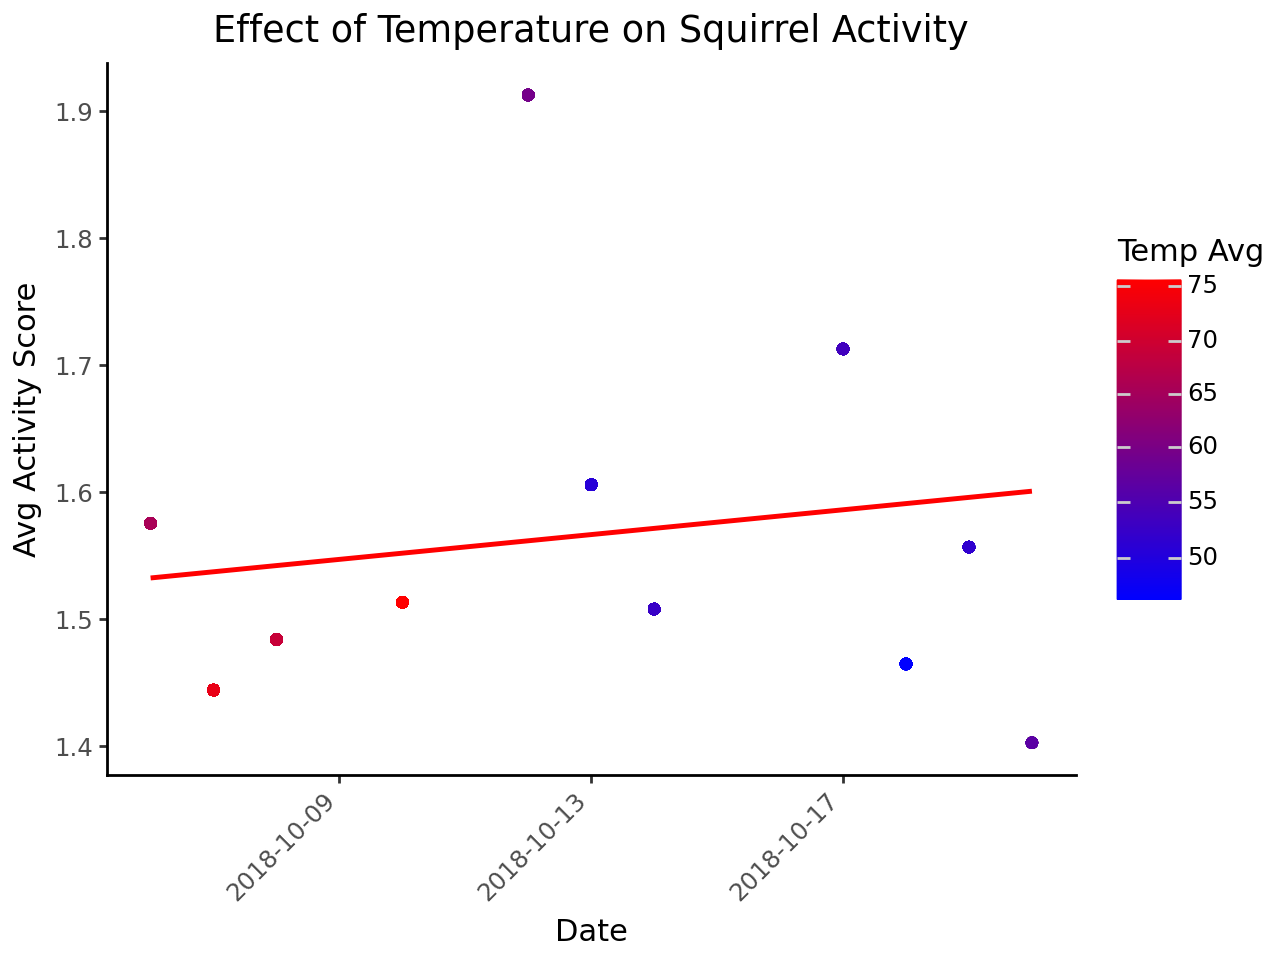

In [54]:
(
       ggplot(merged_df, aes(x='Date', y='Avg Activity Score', color='Temp Avg'))
       + geom_point(alpha=0.5)  # Add alpha for transparency
       + geom_smooth(method='lm', se=False, color='red')  # Make the line red for visibility
       + scale_x_datetime()  # Use scale_x_datetime for date values
       + scale_color_gradient(low = 'blue', high = 'red')  # Select gradient colors for visibility of when it gets cold
       + theme_classic()
       + theme(axis_text_x=element_text(rotation=45, hjust=1))
       + labs(title="Effect of Temperature on Squirrel Activity", x="Date", y="Avg Activity Score")
   )

Interesting! This is very different from the squirrel count graph. Perhaps this indicates that if the squirrels are out, there activity level is around the same despite the temperature. However, with the cooling temperatures less squirrels were seen out. This would be consistent with their state of torpor.

In [55]:
y = merged_df['Avg Activity Score']
X = merged_df['Temp Avg']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
print(results.pvalues)

                            OLS Regression Results                            
Dep. Variable:     Avg Activity Score   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.92e-53
Time:                        19:50:11   Log-Likelihood:                 2173.2
No. Observations:                3023   AIC:                            -4342.
Df Residuals:                    3021   BIC:                            -4330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7642      0.013    133.460      0.0

Once again, significant p-value but extremely low R2.

# Additional Analysis

In [56]:
merged_df['Squirrel Count'] = squirrel_counts_by_date['Squirrel Count'] #add squirrel count to merged df

In [57]:
#Check correlation between activity score, squirrel count, temperature, and precipitation
correlation_matrix = merged_df[['Avg Activity Score', 'Temp Max', 'Temp Min', 'Temp Avg', 'Squirrel Count', 'Precipitation']].corr()
correlation_matrix

,Avg Activity Score,Temp Max,Temp Min,Temp Avg,Squirrel Count,Precipitation
Avg Activity Score,1.000000,-0.196628,-0.338369,-0.273041,-0.239992,0.823457
Temp Max,-0.196628,1.000000,0.945708,0.985620,0.153809,-0.093018
Temp Min,-0.338369,0.945708,1.000000,0.987029,0.285383,-0.235217
Temp Avg,-0.273041,0.985620,0.987029,1.000000,0.224343,-0.168235
Squirrel Count,-0.239992,0.153809,0.285383,0.224343,1.000000,-0.163578
Precipitation,0.823457,-0.093018,-0.235217,-0.168235,-0.163578,1.000000


NameError: name 'plt' is not defined

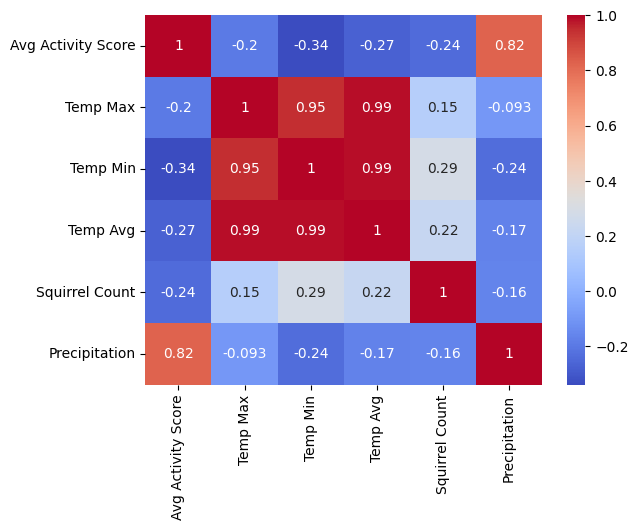

In [58]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Confirms that the strongest statistical relationship discovered was between precipitation and avg activity. It is very interestingly a positive correlation - why might activity be going up? Preparing for winter? Ethan's analysis made shed some light on this.

# Conclusion

Overall, there is not a clearly signficant correlation between the weather and squirrel counts or activity. The dataset ended up being exremely limiting since the census took place over only 11 days during one year and over these 11 days it only rained for 3. However, it was at an interesting time of year, where the temperature began to rapidly drop later in October.  

The strongest statistical relationship observed was the correlation between rain and the average activity score. The p-value was less than 0.05 and the R2 value was 0.296, meaning it accounts for 30% of the variation in the data. Rain activity was higher on days when it rained. It would be interesting to investigate this further. Are they preparing for winter? One article suggested foraging on the ground is easier in light rain and their tails act as umbrellas (so cute)!

The strongest graphic relationship (not statistical!) I found through this analysis was the effect of temperature on squirrel counts. As the average temperature dropped later in October, less squirrels were seen. This is consistent with squirrels behavior - they enter a state of torpor which is similar to hybernation but less intense. Despite having a significant p-value, the regression had a very low R2 value - suggesting the model does not account for much variation.

It would be interesting if this census was conducted yearly so data could be analyzed to understand if squirrels are responding directly to temperature or if they enter this state based on some kind of internal seasonal timing. It may also be helpful as climate change intensifies to see if one of the most human-adaptable animals begins to decline or change behavior. Additionally, more data would allow for better and more accruate statistical analysis.